In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

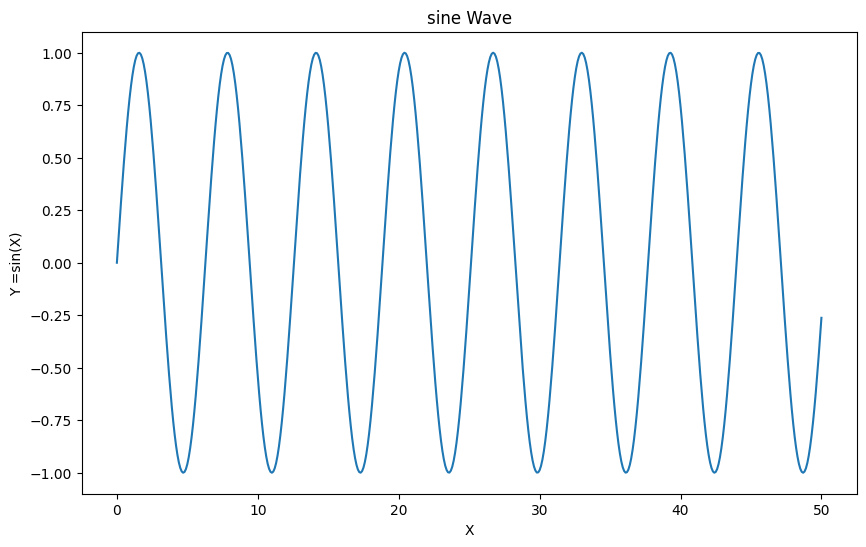

In [25]:
x=np.linspace(0,50,501)
y=np.sin(x)

plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.title('sine Wave')
plt.xlabel('X')
plt.ylabel('Y =sin(X)')
plt.show()

In [26]:
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
      seq = data[i:i + seq_length]
      label = data[i + seq_length]
      sequences.append(seq)
      target.append(label)
    return np.array(sequences), np.array(target)

In [27]:
seq_length=10
x,y=create_sequences(y,seq_length)

x=x.reshape((x.shape[0],x.shape[1],1))

x.shape,y.shape

((491, 10, 1), (491,))

In [28]:
model=Sequential()

model.add(LSTM(50,activation='relu',input_shape=(seq_length, 1)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
history=model.fit(x,y, epochs=200 ,batch_size=32, verbose=1)

Epoch 1/200
16/16 [==============================] - 2s 7ms/step - loss: 0.3661
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 0.1588
Epoch 3/200
16/16 [==============================] - 0s 8ms/step - loss: 0.0701
Epoch 4/200
16/16 [==============================] - 0s 8ms/step - loss: 0.0514
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 0.0329
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 0.0097
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 8/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 9/200
16/16 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 10/200
16/16 [==============================] - 0s 7ms/step - loss: 9.9932e-04
Epoch 11/200
16/16 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 12/200
16/16 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 13/200
16/16 [=============

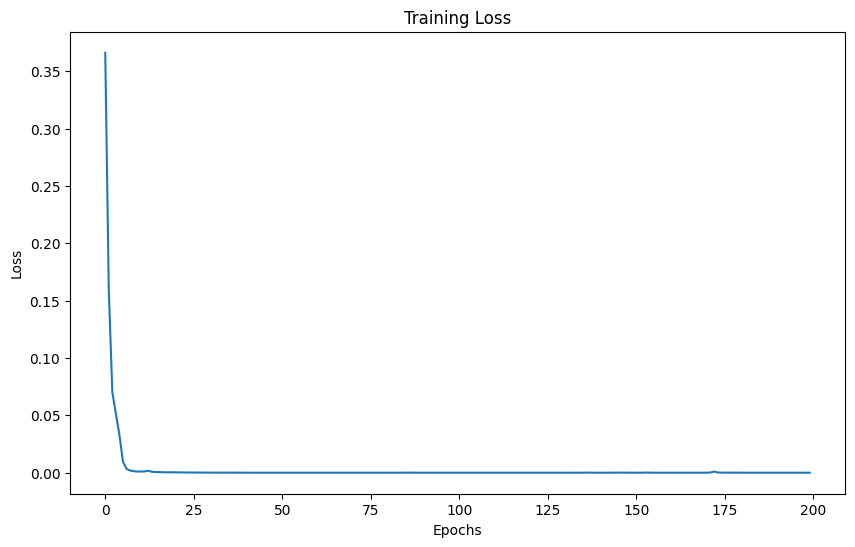

In [30]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [31]:
x_test=np.linspace(50,100,501)
y_test=np.sin(x_test)

In [32]:
x_test, y_test=create_sequences(y_test,seq_length)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1], 1)
y_pred=model.predict(x_test)

16/16 [==============================] - 0s 4ms/step


In [36]:
x_test_reshaped = x_test[:-seq_length].reshape(-1, seq_length, 1)

In [37]:
actual_values = y_test
predicted_values = model.predict(x_test_reshaped)

16/16 [==============================] - 0s 3ms/step


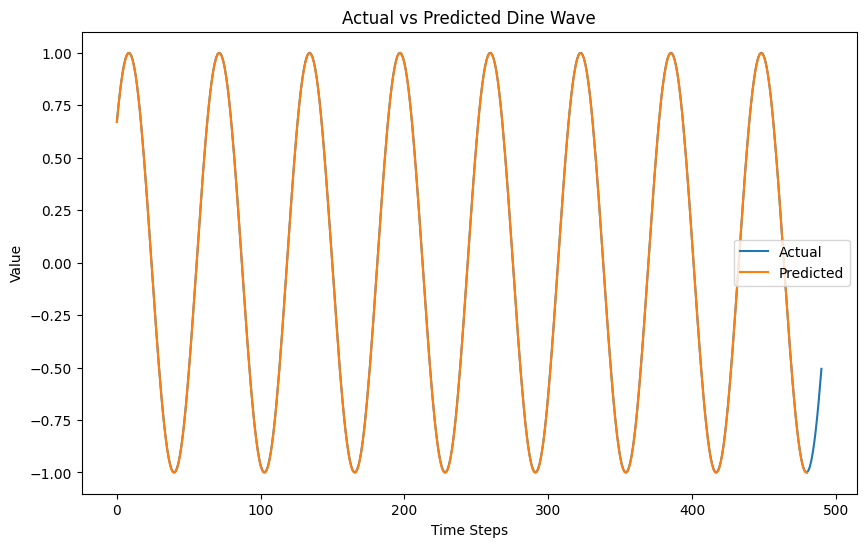

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.title('Actual vs Predicted Dine Wave')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()
